## Basics

### Imports

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import html
import os
import requests
from urllib.parse import quote

### Working Directory Path

In [65]:
# Google Drive Path for Running on Colab
# from google.colab import drive
# drive.mount('/content/drive')
# path = "drive/MyDrive/MSc Thesis/"

In [66]:
# Local Path for Running Locally
path = "./"

### Read Data

In [67]:
data = pd.read_csv(path + 'agora12_data.csv')
data

,Id,Collection,Type,Name,UserGroup,AgoraVolume,AgoraNumber,Text,PublishedNumber,Classification,...,Deposit,Dimensions,Chronology,ChronologyRange,Sort,Sibling,Edges,Bibliography,Parent,AgoraLetter
0,Agora:Object:Agora XII:1,Agora,Object,"Agora XII, no. 1",Public,12,1,Foot missing. Offset neck and echinoid mouth;...,AV 12.1,Black and Plain Pottery | Amphora | Neck-Amphora,...,Q 13:5,H. rest. 0.24; diam. 0.174.,575-550 B.C.,-575;-550,18+0000000001 Agora 0000000012:0000000001,Agora:Object:P 24986,1,"&lt;i&gt;Hesperia,&lt;/i&gt; XXV, 1956, pl. 18 k.",Agora:Image:2012.54.1450,NaN
1,Agora:Object:Agora XII:2,Agora,Object,"Agora XII, no. 2",Public,12,2,Spreading ring foot with torus outer and conve...,AV 12.2,Black and Plain Pottery | Amphora | Neck-Amphora,...,D 7:2,H. 0.292; diam. 0.285.,Late 6th c. B.C.,-525;-500,18+0000000001 Agora 0000000012:0000000002,Agora:Object:P 7266,1,NaN,Agora:Drawing:DA 6616,NaN
2,Agora:Object:Agora XII:3,Agora,Object,"Agora XII, no. 3",Public,12,3,Flaring ring foot. Torus mouth. Ridge at junct...,AV 12.3,Black and Plain Pottery | Amphora | Neck-Amphora,...,G 11:3-POU,H. 0.21; diam. 0.149.,Ca. 500 B.C.,-500,18+0000000001 Agora 0000000012:0000000003,Agora:Object:P 12781,1,NaN,NaN,NaN
3,Agora:Object:Agora XII:4,Agora,Object,"Agora XII, no. 4",Public,12,4,Ring foot. Echinoid mouth inset from neck and ...,AV 12.4,Black and Plain Pottery | Amphora | Neck-Amphora,...,U 19:2-U,H. 0.272; diam. 0.22.,Ca. 500 B.C.,-500,18+0000000001 Agora 0000000012:0000000004,Agora:Object:P 26725,1,NaN,NaN,NaN
4,Agora:Object:Agora XII:5,Agora,Object,"Agora XII, no. 5",Public,12,5,Echinus ring foot. Torus mouth; strap handles....,AV 12.5,"Bottom Fill: Late 6th c. B.C., at latest.",...,V 24:2-POU,H. 0.254; diam. 0.181.,Late 6th c. B.C.,-525;-500,18+0000000001 Agora 0000000012:0000000005,Agora:Object:P 13014,1,NaN,Agora:Image:2012.27.0009,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Agora:Object:Agora XII:2036,Agora,Object,"Agora XII, no. 2036",Public,12,2036,Fragment of rim and floor with handle. Deep b...,AV 12.2036,Black and Plain Pottery | Cooking Devices | Es...,...,O 18:2,NaN,Context ca. 350-320 B.C.,-350;-320,18+0000000001 Agora 0000000012:0000002036,Agora:Object:P 13569,1,NaN,Agora:Drawing:DA 8040,NaN
1996,Agora:Object:Agora XII:2037,Agora,Object,"Agora XII, no. 2037",Public,12,2037,Handles missing. Basin and lid; handles proba...,AV 12.2037,Black and Plain Pottery | Cooking Devices | Es...,...,G 11:4,H. of basin 0.143; diam. 0.36; diam. of lid 0....,"Context, second half of 4th c. B.C.",-350;-301,18+0000000001 Agora 0000000012:0000002037,Agora:Object:P 6218,1,NaN,Agora:Image:2012.55.1261,NaN
1997,Agora:Object:Agora XII:2038,Agora,Object,"Agora XII, no. 2038",Public,12,2038,Small series. Plain flat-topped rim; flaring b...,AV 12.2038,Black and Plain Pottery | Cooking Devices | Es...,...,H 7:1,H. 0.104; diam. 0.246.,Context ca. 435-425 B.C.,-435;-425,18+0000000001 Agora 0000000012:0000002038,Agora:Object:P 4870,1,"&lt;i&gt;Hesperia,&lt;/i&gt; VI, 1937, p. 52, ...",Agora:Image:2012.25.0184,NaN
1998,Agora:Object:Agora XII:2039,Agora,Object,"Agora XII, no. 2039",Public,12,2039,"Small series. Rim flat on top, roughly moulded...",AV 12.2039,Black and Plain Pottery | Cooking Devices | Es...,...,C 12:2,NaN,Context ca. 375-325 B.C.,-375;-325,18+0000000001 Agora 0000000012:0000002039,Agora:Object:P 8304,1,NaN,Agora:Image:2012.55.1268,NaN


## Data Exploration

### Info

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               2000 non-null   object
 1   Collection       2000 non-null   object
 2   Type             2000 non-null   object
 3   Name             2000 non-null   object
 4   UserGroup        2000 non-null   object
 5   AgoraVolume      2000 non-null   int64 
 6   AgoraNumber      2000 non-null   int64 
 7   Text             2000 non-null   object
 8   PublishedNumber  2000 non-null   object
 9   Classification   2000 non-null   object
 10  Class            2000 non-null   object
 11  Deposit          1789 non-null   object
 12  Dimensions       870 non-null    object
 13  Chronology       1994 non-null   object
 14  ChronologyRange  1990 non-null   object
 15  Sort             2000 non-null   object
 16  Sibling          2000 non-null   object
 17  Edges            2000 non-null   

### Missing Values


In [69]:
((data.isna().sum() / len(data)) * 100).round(2).astype(str) + '%'

Id                   0.0%
Collection           0.0%
Type                 0.0%
Name                 0.0%
UserGroup            0.0%
AgoraVolume          0.0%
AgoraNumber          0.0%
Text                 0.0%
PublishedNumber      0.0%
Classification       0.0%
Class                0.0%
Deposit            10.55%
Dimensions          56.5%
Chronology           0.3%
ChronologyRange      0.5%
Sort                 0.0%
Sibling              0.0%
Edges                0.0%
Bibliography       89.15%
Parent              31.7%
AgoraLetter        99.95%
dtype: object

<Axes: >

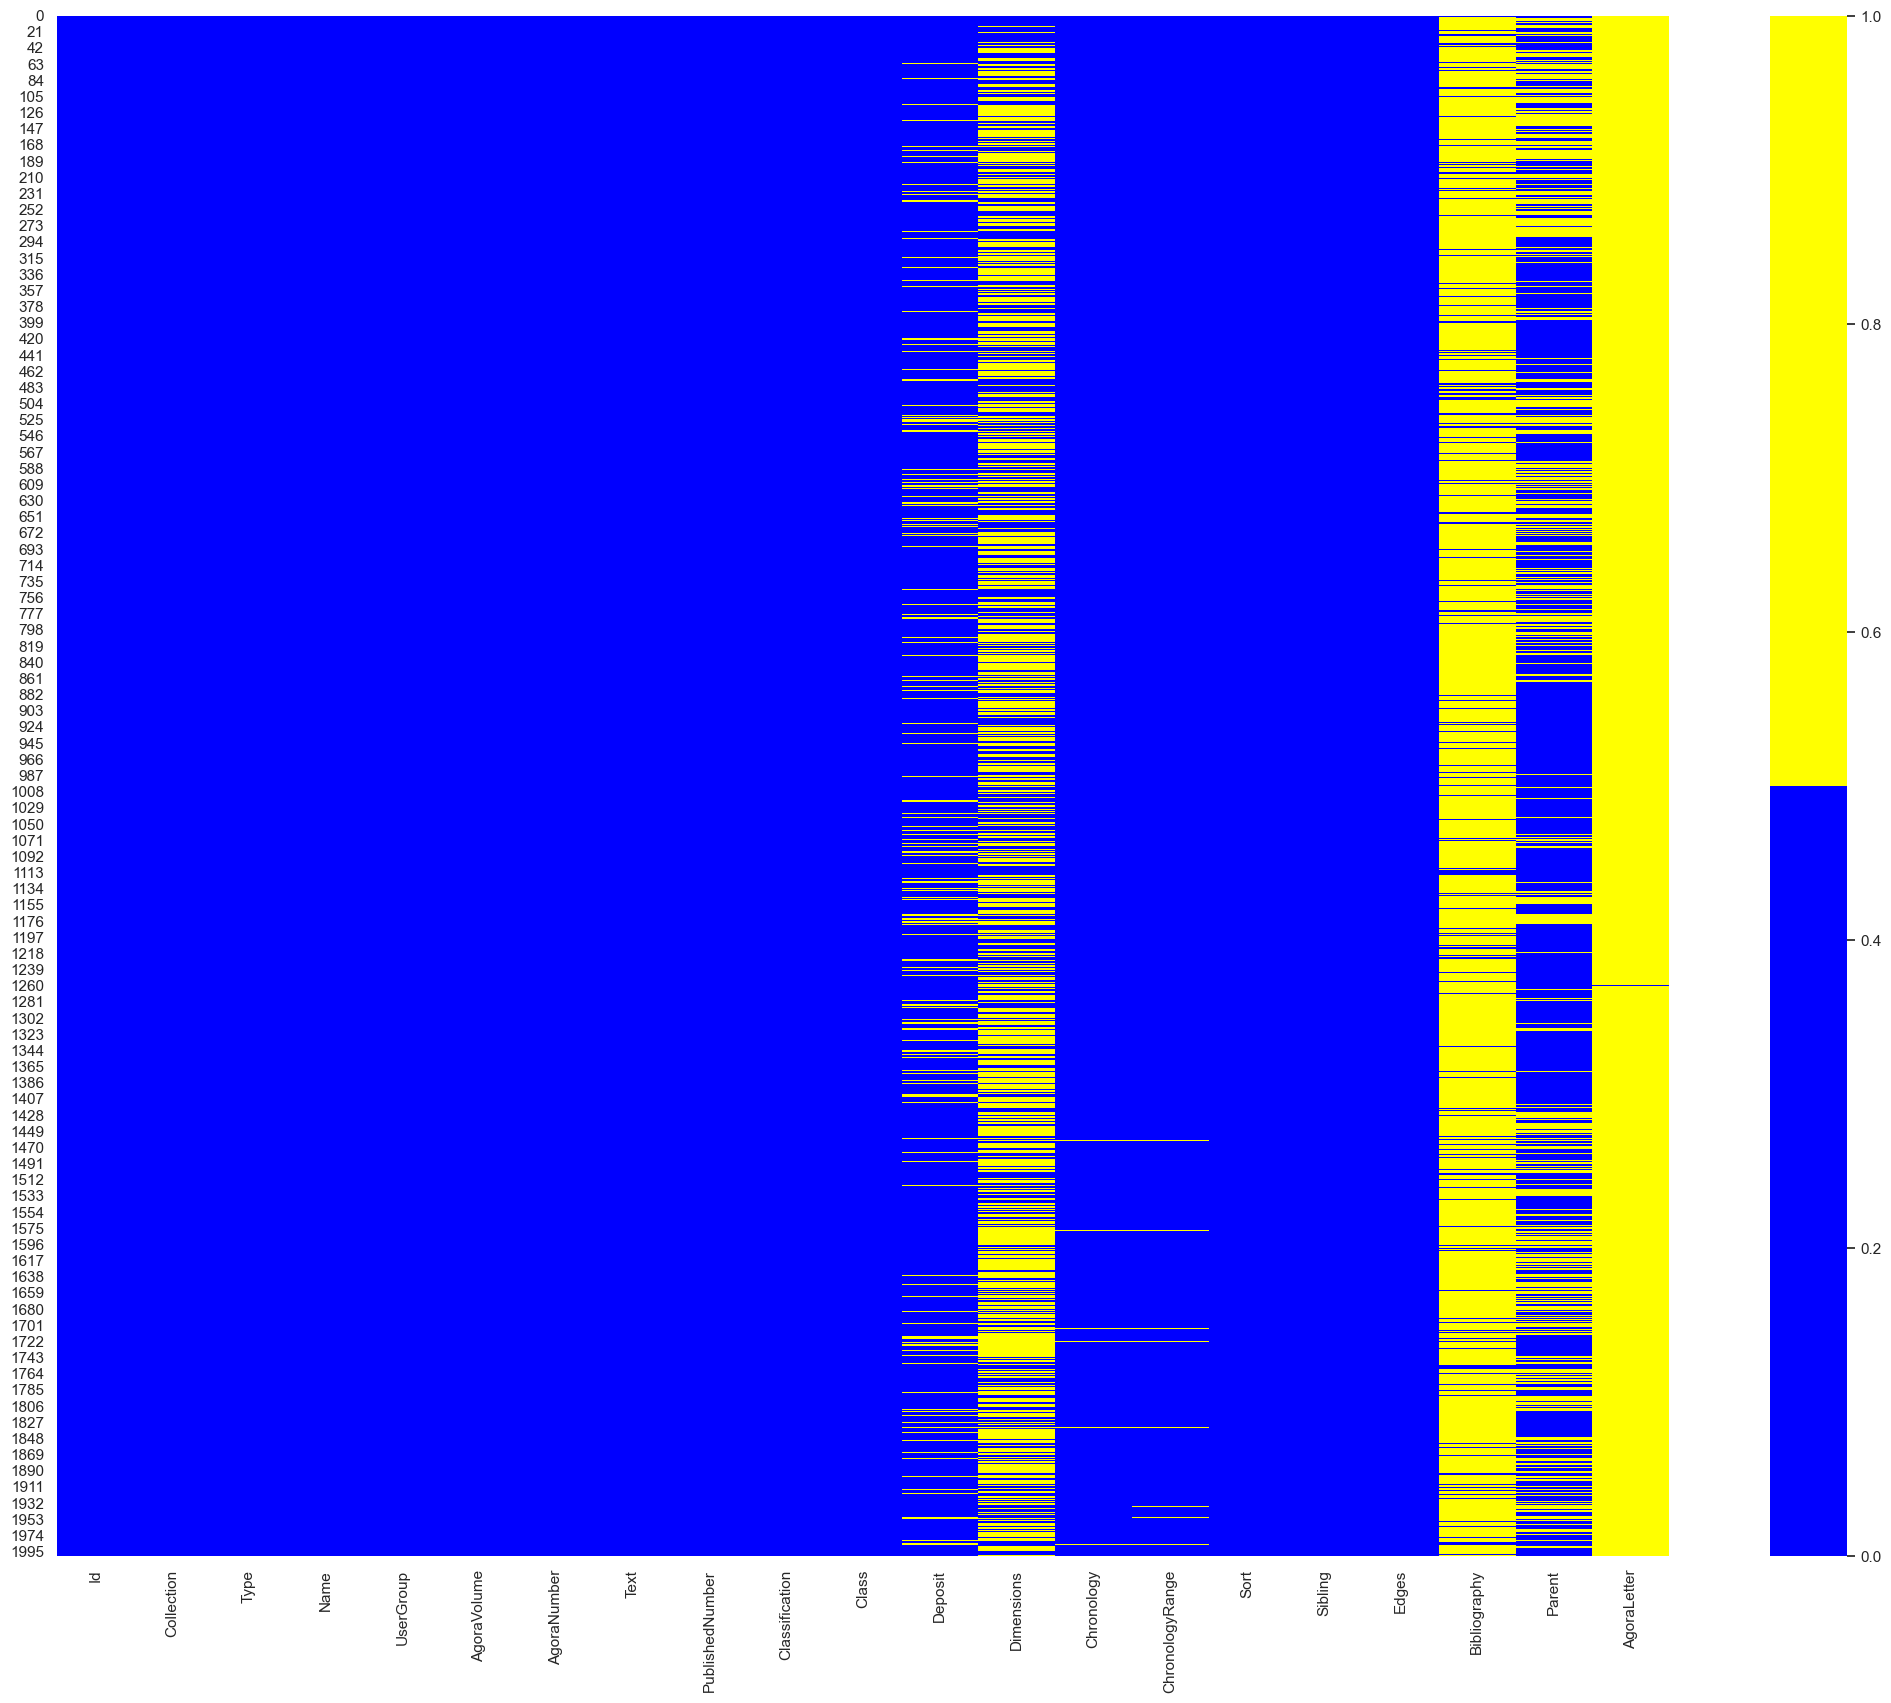

In [70]:
colours = ['blue', 'yellow']  # yellow is missing. blue is not missing.
sns.heatmap(data.isnull(), cmap=sns.color_palette(colours))

### Field: "Dimensions"

In [71]:
labels = {}
for entry in data["Dimensions"].dropna():
    dim = html.unescape(entry)
    dim = re.sub(r"<.*?>", "", dim)
    dim = dim.lower()
    measurements = dim.split(';')
    for measurement in measurements:
        measurement = measurement.strip().rstrip('.')
        # label = measurement.split()[:-1]
        # label = ' '.join(label)
        labelMatch = re.match(r'^(.*?)(?=\d)', measurement)
        if not labelMatch:
            continue
        label = labelMatch.group(1).strip()

        labels[label] = labels[label] + 1 if label in labels else 1
        # labels.add(label)
        # print(label)
labels = dict(sorted(labels.items(), key=lambda x: x[1], reverse=True))
labels

{'diam.': 543,
 'h.': 512,
 'h. pres.': 131,
 'diam. of rim': 69,
 'diam. est.': 55,
 'h. to rim': 39,
 'diam. of foot': 35,
 'max. dim.': 15,
 'diam. of foot est.': 13,
 'diam. of rim est.': 11,
 'diam. ca.': 7,
 'diam. at rim': 6,
 'diam. of base': 6,
 'h. of bowl': 6,
 'l. pres.': 5,
 'diam. of lid': 5,
 'diam. as restored': 4,
 'h. as restored': 4,
 'total h.': 4,
 'h. of lid': 4,
 'diam. of bowl': 4,
 'h. rest.': 3,
 'h. with lid': 3,
 'diam. rest.': 3,
 'l.': 3,
 'diam. of foot ca.': 2,
 'h. pres. to rim,': 2,
 'h. of largest fragment': 2,
 'max. diam.': 2,
 'h. pres. ca.': 2,
 'diam. of rim ca.': 2,
 'diam. est. ca.': 2,
 'diam. of bottom': 2,
 'diam. of body': 2,
 'h. with handle': 2,
 'diam. not less than': 2,
 'w.': 2,
 'diam. of rim of spout': 2,
 'h. overall': 2,
 'diam. at rim ca.': 1,
 'diam of rim, as restored': 1,
 'h. pres. of upper part ca.': 1,
 'h. ca.': 1,
 'w. of handle': 1,
 'h. pres. to rim': 1,
 'diam. of base est.': 1,
 'to top of handle': 1,
 'diam. at keel':

In [72]:
def frequencyBars(labels):
    labelsR = dict(reversed(list(labels.items())))
    plt.figure(figsize=(10, 14))
    plt.barh(range(len(labelsR)), list(labelsR.values()))
    plt.yticks(range(len(labelsR)), list(labelsR.keys()))
    plt.yticks(fontsize=8)
    plt.xlabel('Frequency')
    plt.ylabel('Dimension')
    plt.title('Frequency of Dimensions')
    for index, value in enumerate(labelsR.values()):
        plt.text(value + 2, index, f'{100 * value / data.shape[0]}%', va='center', fontsize=8)  # Adjust +2 for spacing
    plt.show()

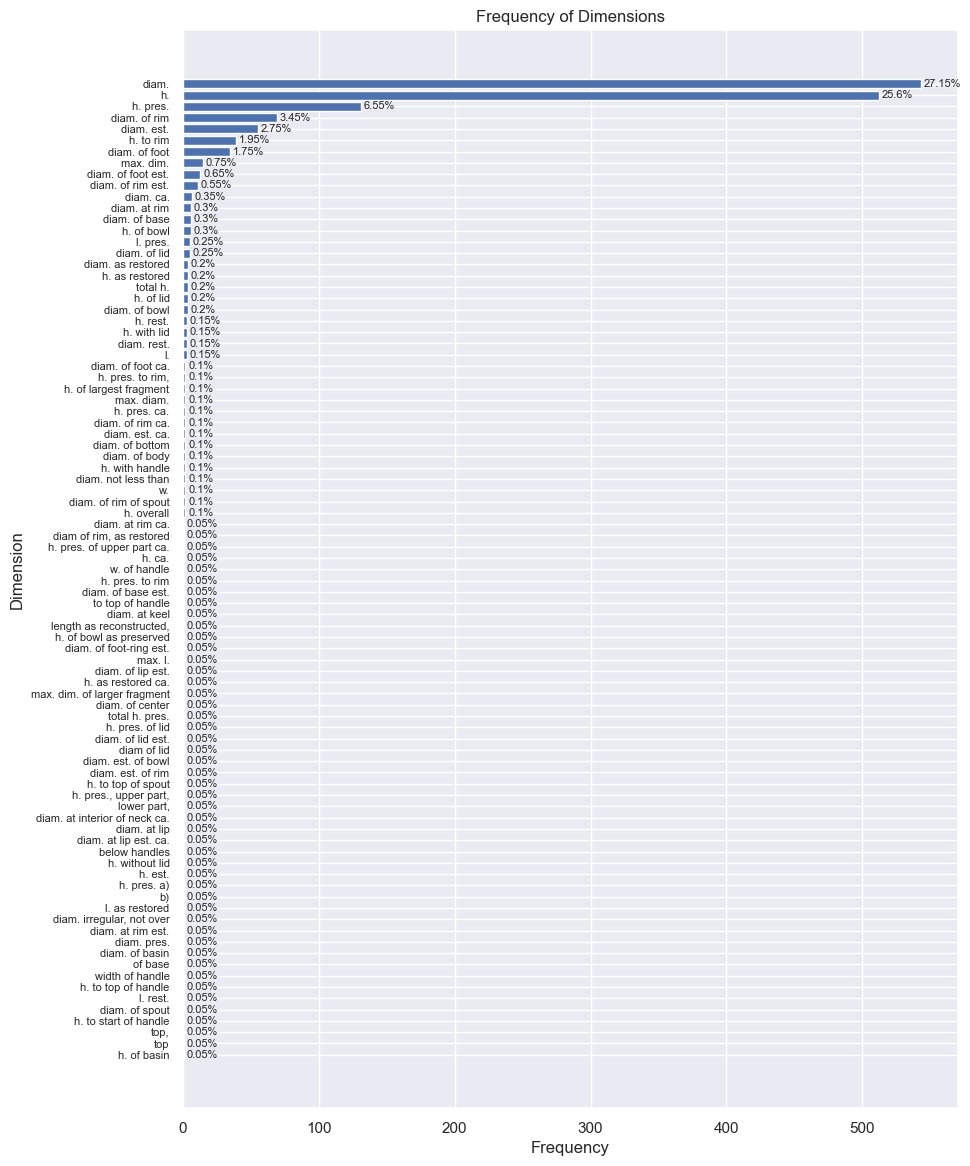

In [73]:
frequencyBars(labels)

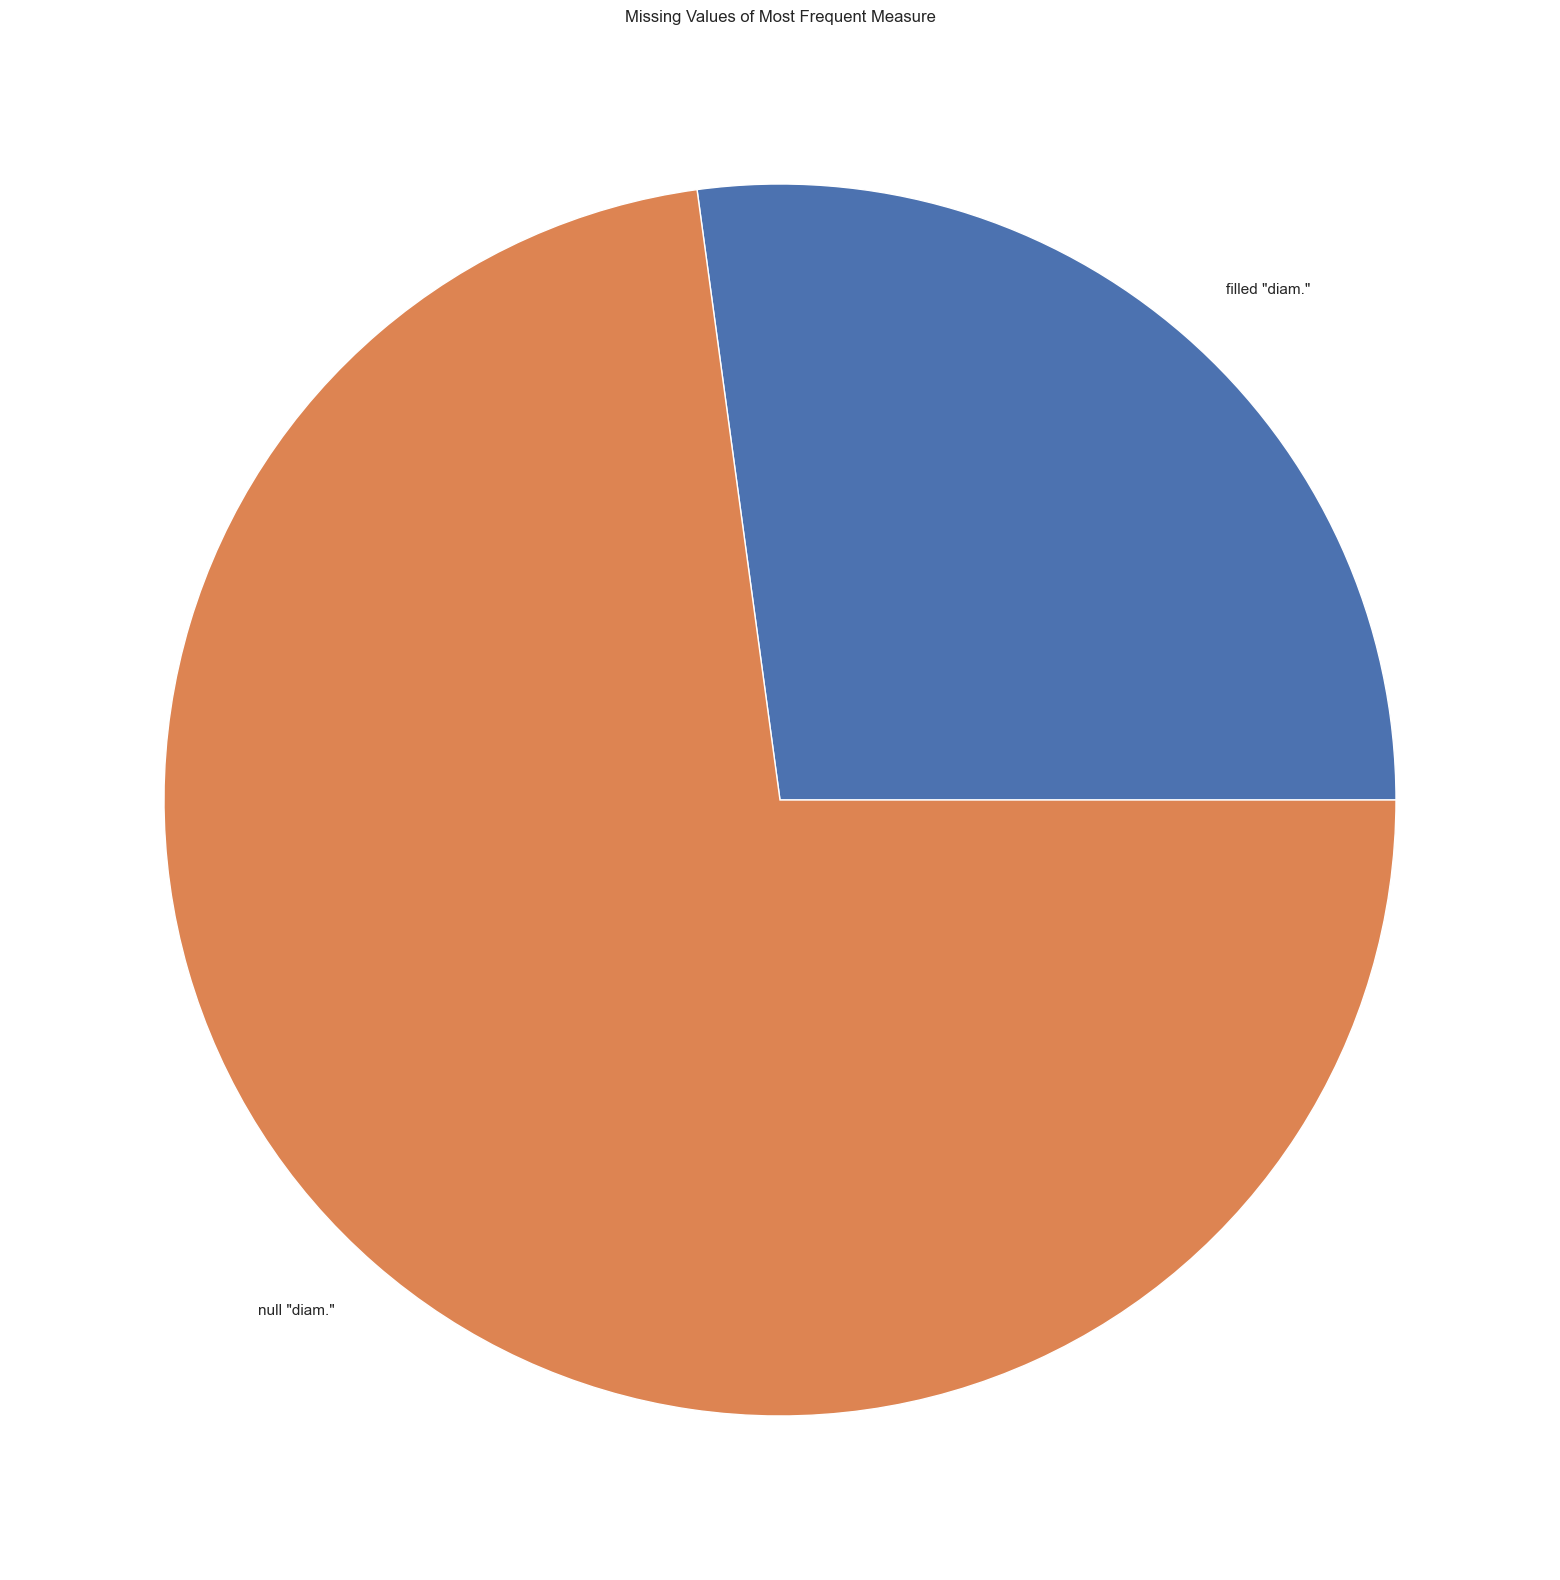

In [74]:
mostFreq = list(labels.items())[0]
perc = mostFreq[1] / data.shape[0]
plt.pie([perc, 1 - perc], labels=[f'filled "{mostFreq[0]}"', f'null "{mostFreq[0]}"'])
plt.title('Missing Values of Most Frequent Measure')
plt.show()

### Fields: "Classification" & "Class"

In [75]:
def uniqueClassFreq(field):
    classes = dict()
    for entry in data[field].dropna():
        entry = html.unescape(entry)
        entry = re.sub(r"<.*?>", "", entry)
        entry = entry.lower()
        entryClasses = entry.split('|')
        for entryClass in entryClasses:
            entryClass = entryClass.strip()
            if not entryClass:
                continue
            classes[entryClass] = classes[entryClass] + 1 if entryClass in classes else 1
    return dict(sorted(classes.items(), key=lambda x: x[1], reverse=True))

In [76]:
classificationClasses = uniqueClassFreq('Classification')
classificationClasses

{'black and plain pottery': 1860,
 'small bowl and saltcellar': 109,
 'oinochoe': 104,
 'lekane': 100,
 'kantharos': 92,
 'jug': 83,
 'plate': 81,
 'imported': 75,
 'skyphos': 73,
 'miniature': 71,
 'saltcellar': 66,
 'lekanis': 66,
 'cup': 64,
 'stemless': 63,
 'amphora and amphoriskos': 63,
 'site': 60,
 'small': 57,
 'cup-skyphos': 56,
 'one-handler': 56,
 'bowl': 55,
 'olpe': 53,
 'plans and drawings': 53,
 'hellenistic pottery and wheelmade table ware': 52,
 'plain rim': 52,
 'lekythos': 49,
 'small bowl': 46,
 'by type': 45,
 'large': 45,
 'mug': 44,
 'askos': 41,
 'type c': 38,
 'main sequence': 38,
 'ca. 525-ca. 300 b.c.': 38,
 'black': 37,
 'mortar': 36,
 'chytra': 36,
 'attic': 35,
 'cup-kantharos': 35,
 'pyxis': 33,
 'variants': 32,
 'stemmed dish': 32,
 'delicate class': 31,
 'outturned rim': 30,
 'louterion': 30,
 'decorated basin and stand fragments': 30,
 'chous': 29,
 'shape 3': 29,
 'table amphora': 29,
 'bolsal': 28,
 'light wall': 28,
 'banded': 27,
 'fragments used 

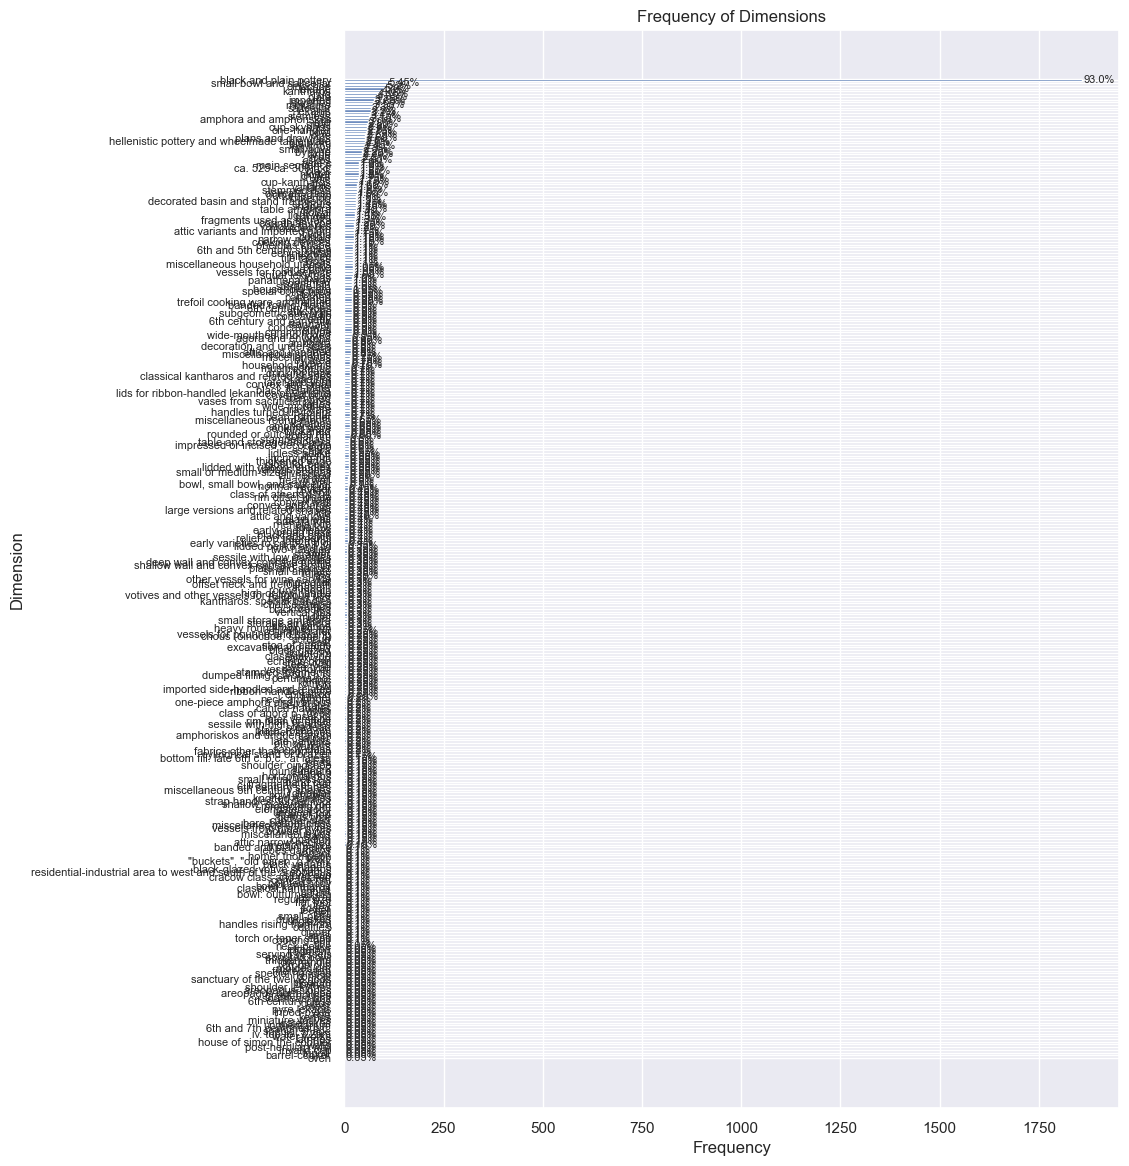

In [77]:
frequencyBars(classificationClasses)

In [78]:
classClasses = uniqueClassFreq('Class')
classClasses

{'black and plain pottery': 2000,
 'kantharos': 124,
 'small bowl and saltcellar': 114,
 'oinochoe': 110,
 'lekane': 105,
 'plate': 95,
 'jug': 86,
 'skyphos': 79,
 'imported': 77,
 'stemless': 72,
 'miniature': 72,
 'lekanis': 69,
 'saltcellar': 67,
 'cup': 66,
 'bowl': 66,
 'amphora and amphoriskos': 65,
 'cup-skyphos': 61,
 'one-handler': 59,
 'small': 57,
 'plain rim': 56,
 'olpe': 54,
 'lekythos': 50,
 'large': 49,
 'small bowl': 47,
 'askos': 45,
 'mug': 44,
 'black': 42,
 'main sequence': 40,
 'ca. 525-ca. 300 b.c.': 40,
 'type c': 39,
 'cup-kantharos': 39,
 'stemmed dish': 39,
 'mortar': 38,
 'chytra': 37,
 'attic': 36,
 'delicate class': 35,
 'chous': 34,
 'shape 3': 34,
 'variants': 34,
 'pyxis': 34,
 'light wall': 32,
 'outturned rim': 32,
 'bolsal': 30,
 'louterion': 30,
 'decorated basin and stand fragments': 30,
 'table amphora': 29,
 'moulded rim': 28,
 'banded': 27,
 'corinthian type': 27,
 'fragments used as ostraka': 27,
 'attic variants and imported plain': 26,
 'hyd

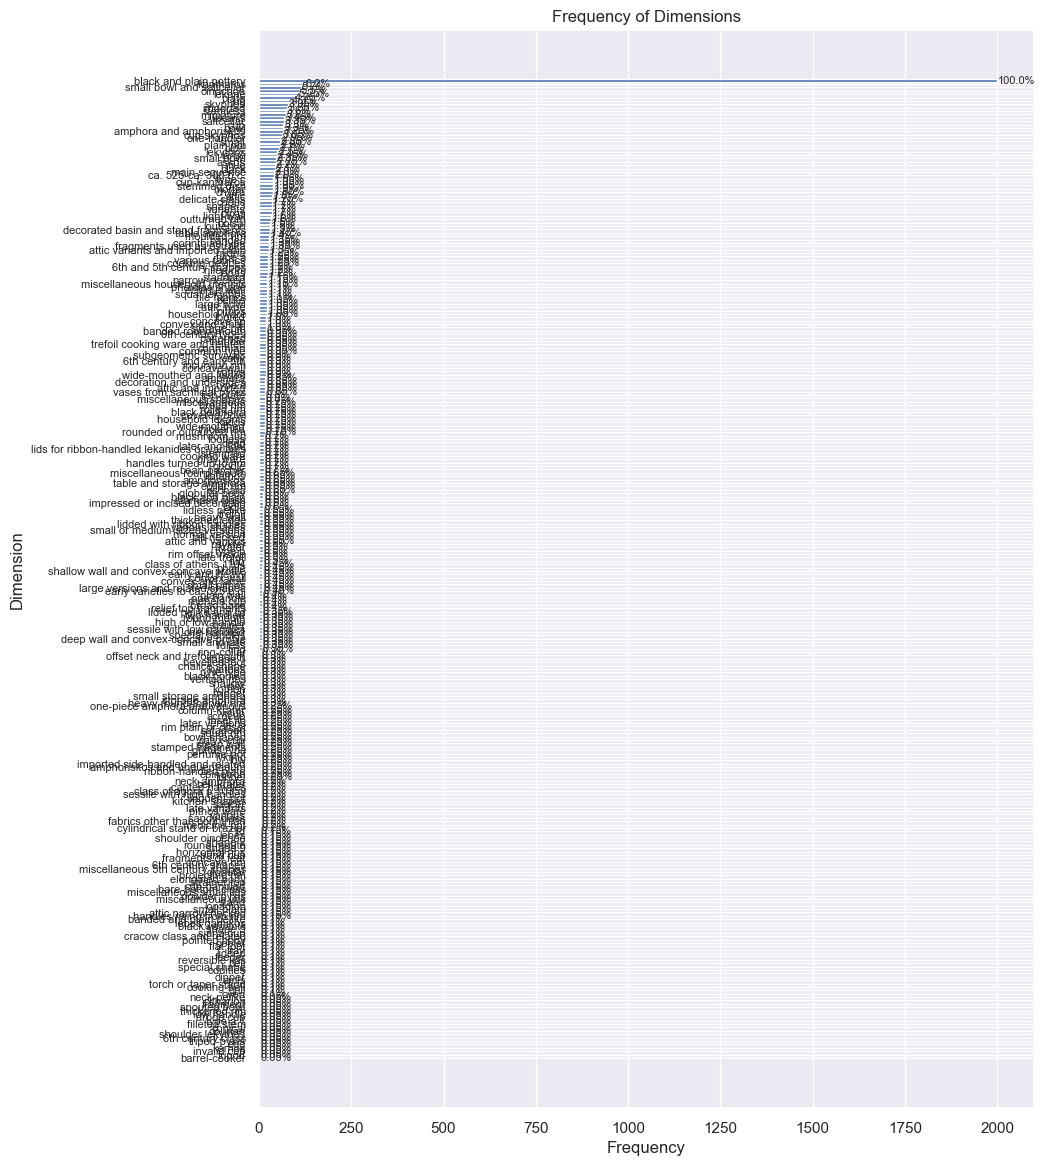

In [79]:
frequencyBars(classClasses)

### Fields: "Chronology" & "ChronologyRange"

In [80]:
data[['Chronology', 'ChronologyRange']]

,Chronology,ChronologyRange
0,575-550 B.C.,-575;-550
1,Late 6th c. B.C.,-525;-500
2,Ca. 500 B.C.,-500
3,Ca. 500 B.C.,-500
4,Late 6th c. B.C.,-525;-500
...,...,...
1995,Context ca. 350-320 B.C.,-350;-320
1996,"Context, second half of 4th c. B.C.",-350;-301
1997,Context ca. 435-425 B.C.,-435;-425
1998,Context ca. 375-325 B.C.,-375;-325


In [81]:
data = data.dropna(subset=['ChronologyRange'])

# Split ChronologyRange into StartYear and EndYear
data[['StartYear', 'EndYear']] = data['ChronologyRange'].str.split(';', expand=True).copy()

# If EndYear is missing, set it equal to StartYear
data.loc[:, "EndYear"] = data["EndYear"].fillna(data["StartYear"])

# Convert to int
data.loc[:, "StartYear"] = data["StartYear"].astype(int)
data.loc[:, "EndYear"] = data["EndYear"].astype(int)

data[['ChronologyRange', 'StartYear', 'EndYear']]

C:\Users\dimit\AppData\Local\Temp\ipykernel_25412\3725312712.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['StartYear', 'EndYear']] = data['ChronologyRange'].str.split(';', expand=True).copy()
C:\Users\dimit\AppData\Local\Temp\ipykernel_25412\3725312712.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['StartYear', 'EndYear']] = data['ChronologyRange'].str.split(';', expand=True).copy()


,ChronologyRange,StartYear,EndYear
0,-575;-550,-575,-550
1,-525;-500,-525,-500
2,-500,-500,-500
3,-500,-500,-500
4,-525;-500,-525,-500
...,...,...,...
1995,-350;-320,-350,-320
1996,-350;-301,-350,-301
1997,-435;-425,-435,-425
1998,-375;-325,-375,-325


In [82]:
dataSorted = data.sort_values(by=['StartYear'])
allYears = list(range(dataSorted['StartYear'].min(), dataSorted['EndYear'].max() + 1))

years = []
for index, row in dataSorted.iterrows():
    entryYears = []
    for year in allYears:
        entryYears += [1 if row['StartYear'] <= year <= row['EndYear'] else 0]
    years += [entryYears]
years = pd.DataFrame(years, index=dataSorted.index, columns=allYears)
# years

<Axes: >

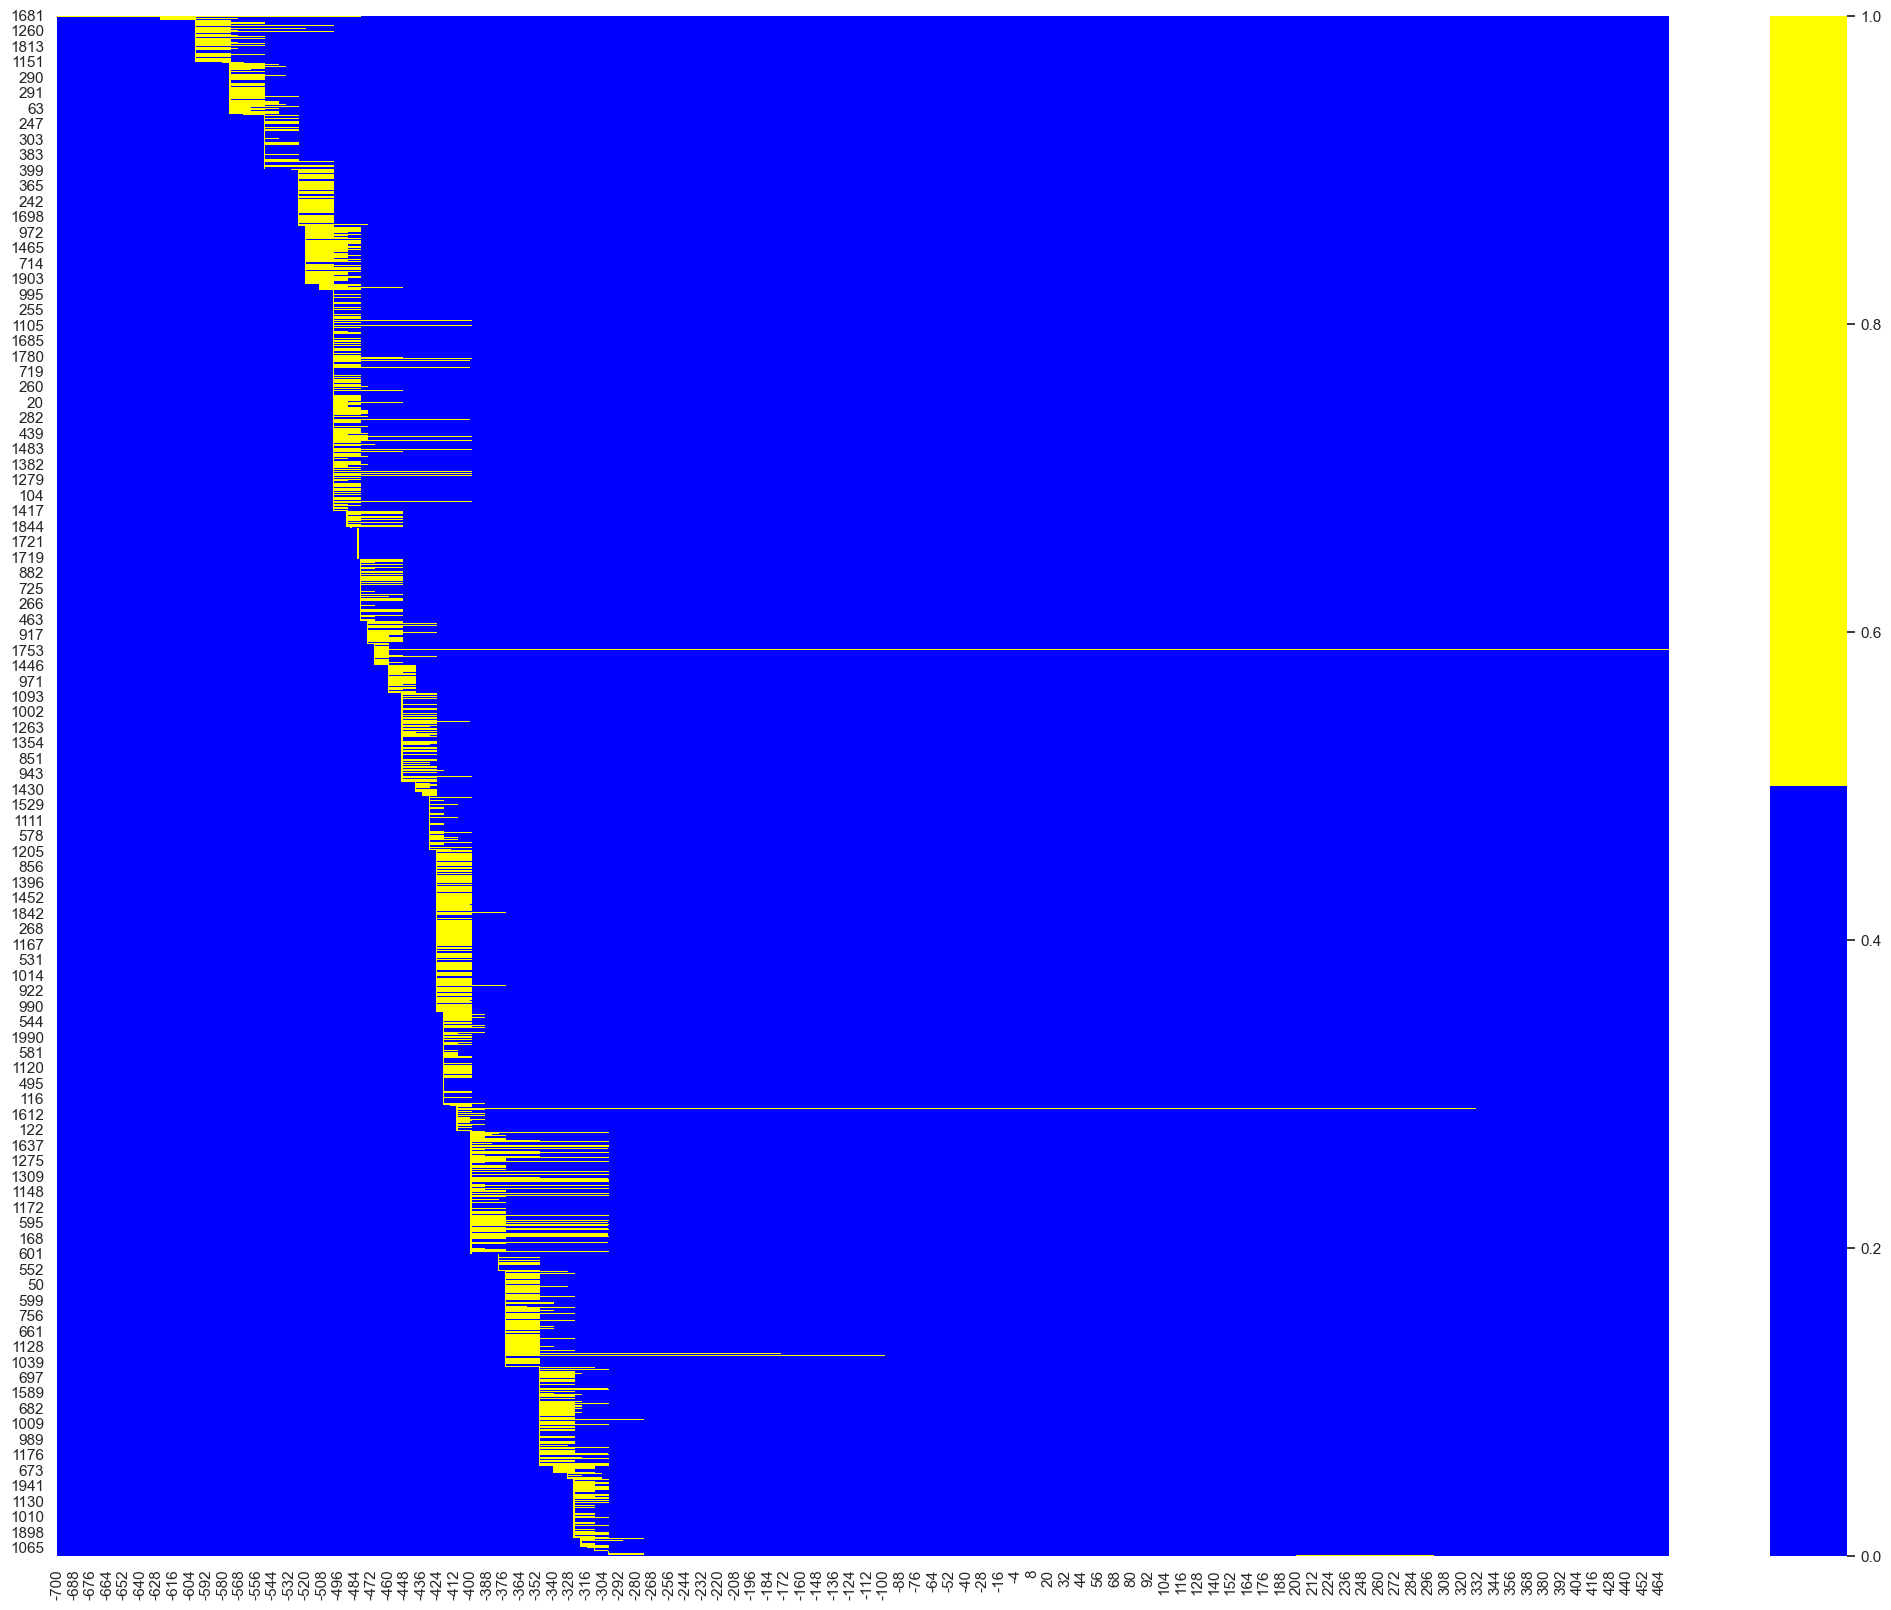

In [83]:
colours = ['blue', 'yellow']  # yellow is missing. blue is not missing.
sns.set_theme(rc={'figure.figsize': (26, 20)})
sns.heatmap(years, cmap=sns.color_palette(colours))

### Images

In [84]:
imageRecords = data["Parent"].str.contains("Agora:Image", na=False).sum()
print(f"Total Records with Image IDs in Parent Field:")
print(f"{imageRecords} ({(100 * imageRecords / len(data)).round(2)}% of dataset)")

Total Records with Image IDs in Parent Field:
1041 (52.31% of dataset)


#### Download Images

In [85]:
imageUrl = "https://ascsa.net/image"
imageDir = path + "pottery_images"

os.makedirs(imageDir, exist_ok=True)

In [86]:
# Function to download images
def downloadImage(imageID, imageType="full"):
    # Escape colons to match URL format
    escImageID = quote(imageID, safe='')

    # Construct the download URL
    url = f"{imageUrl}?type={imageType}&id={escImageID}"

    # Define the image's path
    imageFilename = imageID.replace(":", "_") + ".jpg"
    imagePath = os.path.join(imageDir, imageFilename)

    try:
        # Send HTTP request
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Raise error if request fails

        # Save image
        with open(imagePath, "wb") as file:
            for chunk in response.iter_content(1024):
                file.write(chunk)

        print(f"✅ Downloaded: {imageFilename}")
        return imageFilename

    except requests.RequestException as e:
        print(f"❌ Failed to download {imageID}: {e}")
        return None

In [87]:
for index, record in data.iterrows():
    imageID = record["Parent"]

    if type(imageID) != str:
        continue
    if not imageID.startswith("Agora:Image"):
        continue

    downloadedFilename = downloadImage(imageID)

    if downloadedFilename:
        data.loc[index, "ImageFilename"] = downloadedFilename

✅ Downloaded: Agora_Image_2012.54.1450.jpg
✅ Downloaded: Agora_Image_2012.27.0009.jpg


C:\Users\dimit\AppData\Local\Temp\ipykernel_25412\3940337066.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[index, "ImageFilename"] = downloadedFilename


✅ Downloaded: Agora_Image_2012.56.0468.jpg
✅ Downloaded: Agora_Image_2012.56.0468.jpg
✅ Downloaded: Agora_Image_2012.54.1467.jpg
✅ Downloaded: Agora_Image_2000.06.0201.jpg
✅ Downloaded: Agora_Image_2017.03.0408.jpg
✅ Downloaded: Agora_Image_2012.50.0871.jpg
✅ Downloaded: Agora_Image_2012.56.0518.jpg
✅ Downloaded: Agora_Image_2012.56.0518.jpg
✅ Downloaded: Agora_Image_2012.56.0518.jpg
✅ Downloaded: Agora_Image_2012.56.0467.jpg
✅ Downloaded: Agora_Image_2012.56.0467.jpg
✅ Downloaded: Agora_Image_2012.56.0467.jpg
✅ Downloaded: Agora_Image_2012.56.0048.jpg
✅ Downloaded: Agora_Image_2012.56.0048.jpg
❌ Failed to download Agora:Image:2014.01.0113: 404 Client Error: Not Found for url: https://ascsa.net/image?type=full&id=Agora%3AImage%3A2014.01.0113
✅ Downloaded: Agora_Image_2012.56.0134.jpg
✅ Downloaded: Agora_Image_2012.51.0790.jpg
❌ Failed to download Agora:Image:2014.01.0113: 404 Client Error: Not Found for url: https://ascsa.net/image?type=full&id=Agora%3AImage%3A2014.01.0113
✅ Downloaded

In [88]:
data.loc[data["ImageFilename"].notna()]

,Id,Collection,Type,Name,UserGroup,AgoraVolume,AgoraNumber,Text,PublishedNumber,Classification,...,ChronologyRange,Sort,Sibling,Edges,Bibliography,Parent,AgoraLetter,StartYear,EndYear,ImageFilename
0,Agora:Object:Agora XII:1,Agora,Object,"Agora XII, no. 1",Public,12,1,Foot missing. Offset neck and echinoid mouth;...,AV 12.1,Black and Plain Pottery | Amphora | Neck-Amphora,...,-575;-550,18+0000000001 Agora 0000000012:0000000001,Agora:Object:P 24986,1,"&lt;i&gt;Hesperia,&lt;/i&gt; XXV, 1956, pl. 18 k.",Agora:Image:2012.54.1450,NaN,-575,-550,Agora_Image_2012.54.1450.jpg
4,Agora:Object:Agora XII:5,Agora,Object,"Agora XII, no. 5",Public,12,5,Echinus ring foot. Torus mouth; strap handles....,AV 12.5,"Bottom Fill: Late 6th c. B.C., at latest.",...,-525;-500,18+0000000001 Agora 0000000012:0000000005,Agora:Object:P 13014,1,NaN,Agora:Image:2012.27.0009,NaN,-525,-500,Agora_Image_2012.27.0009.jpg
9,Agora:Object:Agora XII:10,Agora,Object,"Agora XII, no. 10",Public,12,10,Knob only. Pomegranate knob. Groove round sta...,AV 12.10,Black and Plain Pottery | Amphora | Lid,...,-500,18+0000000001 Agora 0000000012:0000000010,Agora:Object:P 985,1,NaN,Agora:Image:2012.56.0468,NaN,-500,-500,Agora_Image_2012.56.0468.jpg
10,Agora:Object:Agora XII:11,Agora,Object,"Agora XII, no. 11",Public,12,11,"Top of knob missing. Lid. Nearly flat on top,...",AV 12.11,Black and Plain Pottery | Amphora | Lid,...,-480;-450,18+0000000001 Agora 0000000012:0000000011,Agora:Object:P 16040,1,NaN,Agora:Image:2012.56.0468,NaN,-480,-450,Agora_Image_2012.56.0468.jpg
12,Agora:Object:Agora XII:13,Agora,Object,"Agora XII, no. 13",Public,12,13,Flaring ring foot. Torus mouth; round handles....,AV 12.13,Black and Plain Pottery | Pelike | Lidless Pelike,...,-525,18+0000000001 Agora 0000000012:0000000013,Agora:Object:P 25271,1,"&lt;i&gt;Hesperia,&lt;/i&gt; XXV, 1956, pl. 19 e.",Agora:Image:2012.54.1467,NaN,-525,-525,Agora_Image_2012.54.1467.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,Agora:Object:Agora XII:2034,Agora,Object,"Agora XII, no. 2034",Public,12,2034,Stand missing. Broad bowl with deep central c...,AV 12.2034,Black and Plain Pottery | Cooking Devices | Es...,...,-350;-300,18+0000000001 Agora 0000000012:0000002034,Agora:Object:P 4463,1,NaN,Agora:Image:2012.55.1262,NaN,-350,-300,Agora_Image_2012.55.1262.jpg
1994,Agora:Object:Agora XII:2035,Agora,Object,"Agora XII, no. 2035",Public,12,2035,Fragments from two closely similar examples; c...,AV 12.2035,Black and Plain Pottery | Cooking Devices | Es...,...,-375;-325,18+0000000001 Agora 0000000012:0000002035,Agora:Object:P 8312,1,NaN,Agora:Image:2012.56.0490,NaN,-375,-325,Agora_Image_2012.56.0490.jpg
1996,Agora:Object:Agora XII:2037,Agora,Object,"Agora XII, no. 2037",Public,12,2037,Handles missing. Basin and lid; handles proba...,AV 12.2037,Black and Plain Pottery | Cooking Devices | Es...,...,-350;-301,18+0000000001 Agora 0000000012:0000002037,Agora:Object:P 6218,1,NaN,Agora:Image:2012.55.1261,NaN,-350,-301,Agora_Image_2012.55.1261.jpg
1997,Agora:Object:Agora XII:2038,Agora,Object,"Agora XII, no. 2038",Public,12,2038,Small series. Plain flat-topped rim; flaring b...,AV 12.2038,Black and Plain Pottery | Cooking Devices | Es...,...,-435;-425,18+0000000001 Agora 0000000012:0000002038,Agora:Object:P 4870,1,"&lt;i&gt;Hesperia,&lt;/i&gt; VI, 1937, p. 52, ...",Agora:Image:2012.25.0184,NaN,-435,-425,Agora_Image_2012.25.0184.jpg


In [89]:
print(f"Records with downloaded image file: {data["ImageFilename"].notna().sum()}")
print(f"Unique downloaded image files: {data["ImageFilename"].nunique()}")

Records with downloaded image file: 950
Unique downloaded image files: 476


## Data Cleaning

- **HTML Decoding**: Converts encoded HTML entities (like `&lt;` → `<`) using `html.unescape`.
- **HTML Tag Removal**: Removes all HTML tags, such as `<i>` and `<b>`, using a regular expression.
- **Normalize Whitespace**: Ensures clean formatting by collapsing tabs, multiple spaces, and newlines.
- **Special Character Removal**: Removes symbols and characters, keeping only letters, numbers, spaces, and selected punctuation (`.,!?-;:`). Retaining punctuation may preserve context relevance.
- **Lowercasing**: Makes text consistent for textual analysis.


In [90]:
# Function to clean text data
def clean_text(text):
    # Handle missing values
    if pd.isna(text):
        return ""

    # Decode HTML entities (e.g., &lt;b&gt; -> <b>)
    text = html.unescape(text)

    # Remove HTML tags
    text = re.sub(r"<.*?>", "", text)

    # Remove special characters (retain alphanumeric and some punctuation)
    text = re.sub(r"[^\w\s.,;:!?-]", "", text)

    # Convert to lowercase
    text = text.lower()

    # Normalize whitespace (remove line breaks, tabs, extra spaces)
    text = re.sub(r"[\r\n\t]+", " ", text)
    text = re.sub(r"\s+", " ", text).strip()

    return text


In [91]:
# Cleaning individual columns
# Combine into the single 'CombinedText' column:
data.loc[:, "CombinedText"] = (
        data["Text"].apply(clean_text) + " " +
        data["Classification"].apply(clean_text) + " " +
        data["Class"].apply(clean_text) + " " +
        data["Dimensions"].apply(clean_text)
)

C:\Users\dimit\AppData\Local\Temp\ipykernel_25412\825021402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "CombinedText"] = (


In [92]:
data

,Id,Collection,Type,Name,UserGroup,AgoraVolume,AgoraNumber,Text,PublishedNumber,Classification,...,Sort,Sibling,Edges,Bibliography,Parent,AgoraLetter,StartYear,EndYear,ImageFilename,CombinedText
0,Agora:Object:Agora XII:1,Agora,Object,"Agora XII, no. 1",Public,12,1,Foot missing. Offset neck and echinoid mouth;...,AV 12.1,Black and Plain Pottery | Amphora | Neck-Amphora,...,18+0000000001 Agora 0000000012:0000000001,Agora:Object:P 24986,1,"&lt;i&gt;Hesperia,&lt;/i&gt; XXV, 1956, pl. 18 k.",Agora:Image:2012.54.1450,NaN,-575,-550,Agora_Image_2012.54.1450.jpg,foot missing. offset neck and echinoid mouth; ...
1,Agora:Object:Agora XII:2,Agora,Object,"Agora XII, no. 2",Public,12,2,Spreading ring foot with torus outer and conve...,AV 12.2,Black and Plain Pottery | Amphora | Neck-Amphora,...,18+0000000001 Agora 0000000012:0000000002,Agora:Object:P 7266,1,NaN,Agora:Drawing:DA 6616,NaN,-525,-500,NaN,spreading ring foot with torus outer and conve...
2,Agora:Object:Agora XII:3,Agora,Object,"Agora XII, no. 3",Public,12,3,Flaring ring foot. Torus mouth. Ridge at junct...,AV 12.3,Black and Plain Pottery | Amphora | Neck-Amphora,...,18+0000000001 Agora 0000000012:0000000003,Agora:Object:P 12781,1,NaN,NaN,NaN,-500,-500,NaN,flaring ring foot. torus mouth. ridge at junct...
3,Agora:Object:Agora XII:4,Agora,Object,"Agora XII, no. 4",Public,12,4,Ring foot. Echinoid mouth inset from neck and ...,AV 12.4,Black and Plain Pottery | Amphora | Neck-Amphora,...,18+0000000001 Agora 0000000012:0000000004,Agora:Object:P 26725,1,NaN,NaN,NaN,-500,-500,NaN,ring foot. echinoid mouth inset from neck and ...
4,Agora:Object:Agora XII:5,Agora,Object,"Agora XII, no. 5",Public,12,5,Echinus ring foot. Torus mouth; strap handles....,AV 12.5,"Bottom Fill: Late 6th c. B.C., at latest.",...,18+0000000001 Agora 0000000012:0000000005,Agora:Object:P 13014,1,NaN,Agora:Image:2012.27.0009,NaN,-525,-500,Agora_Image_2012.27.0009.jpg,echinus ring foot. torus mouth; strap handles....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Agora:Object:Agora XII:2036,Agora,Object,"Agora XII, no. 2036",Public,12,2036,Fragment of rim and floor with handle. Deep b...,AV 12.2036,Black and Plain Pottery | Cooking Devices | Es...,...,18+0000000001 Agora 0000000012:0000002036,Agora:Object:P 13569,1,NaN,Agora:Drawing:DA 8040,NaN,-350,-320,NaN,fragment of rim and floor with handle. deep ba...
1996,Agora:Object:Agora XII:2037,Agora,Object,"Agora XII, no. 2037",Public,12,2037,Handles missing. Basin and lid; handles proba...,AV 12.2037,Black and Plain Pottery | Cooking Devices | Es...,...,18+0000000001 Agora 0000000012:0000002037,Agora:Object:P 6218,1,NaN,Agora:Image:2012.55.1261,NaN,-350,-301,Agora_Image_2012.55.1261.jpg,handles missing. basin and lid; handles probab...
1997,Agora:Object:Agora XII:2038,Agora,Object,"Agora XII, no. 2038",Public,12,2038,Small series. Plain flat-topped rim; flaring b...,AV 12.2038,Black and Plain Pottery | Cooking Devices | Es...,...,18+0000000001 Agora 0000000012:0000002038,Agora:Object:P 4870,1,"&lt;i&gt;Hesperia,&lt;/i&gt; VI, 1937, p. 52, ...",Agora:Image:2012.25.0184,NaN,-435,-425,Agora_Image_2012.25.0184.jpg,small series. plain flat-topped rim; flaring b...
1998,Agora:Object:Agora XII:2039,Agora,Object,"Agora XII, no. 2039",Public,12,2039,"Small series. Rim flat on top, roughly moulded...",AV 12.2039,Black and Plain Pottery | Cooking Devices | Es...,...,18+0000000001 Agora 0000000012:0000002039,Agora:Object:P 8304,1,NaN,Agora:Image:2012.55.1268,NaN,-375,-325,Agora_Image_2012.55.1268.jpg,"small series. rim flat on top, roughly moulded..."
